In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#データを読み込む
import numpy as np

battery_power = df.battery_power
blue = df.blue
clock_speed = df.clock_speed
dual_sim = df.dual_sim
fc = df.fc
four_g = df.four_g
int_memory = df.int_memory
m_dep = df.m_dep
mobile_wt = df.mobile_wt
n_cores = df.n_cores
pc = df.pc
px_height = df.px_height
px_width = df.px_width
ram = df.ram
sc_h = df.sc_h
sc_w = df.sc_w
talk_time = df.talk_time
three_g = df.three_g
touch_screen = df.touch_screen
wifi = df.wifi
price_range = df.price_range

#利用するパラメータを指定する
df2=pd.concat([price_range, battery_power, blue, clock_speed, dual_sim, fc, four_g, 
               int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width,
               ram , sc_h, sc_w, talk_time, three_g, touch_screen, wifi], axis=1)

#被説明変数として利用するものを取り出す
price2 = pd.DataFrame(df2.price_range)
#被説明変数を抜き取る
x_list2 = df2.drop("price_range",1)

#異常値やnull になっている値を除去する
x_list2 = x_list2.drop(x_list2.columns[np.isnan(x_list2).any()], axis=1)

C:\Users\murak\AppData\Local\Temp\ipykernel_23736\3615978839.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_list2 = df2.drop("price_range",1)


<AxesSubplot:>

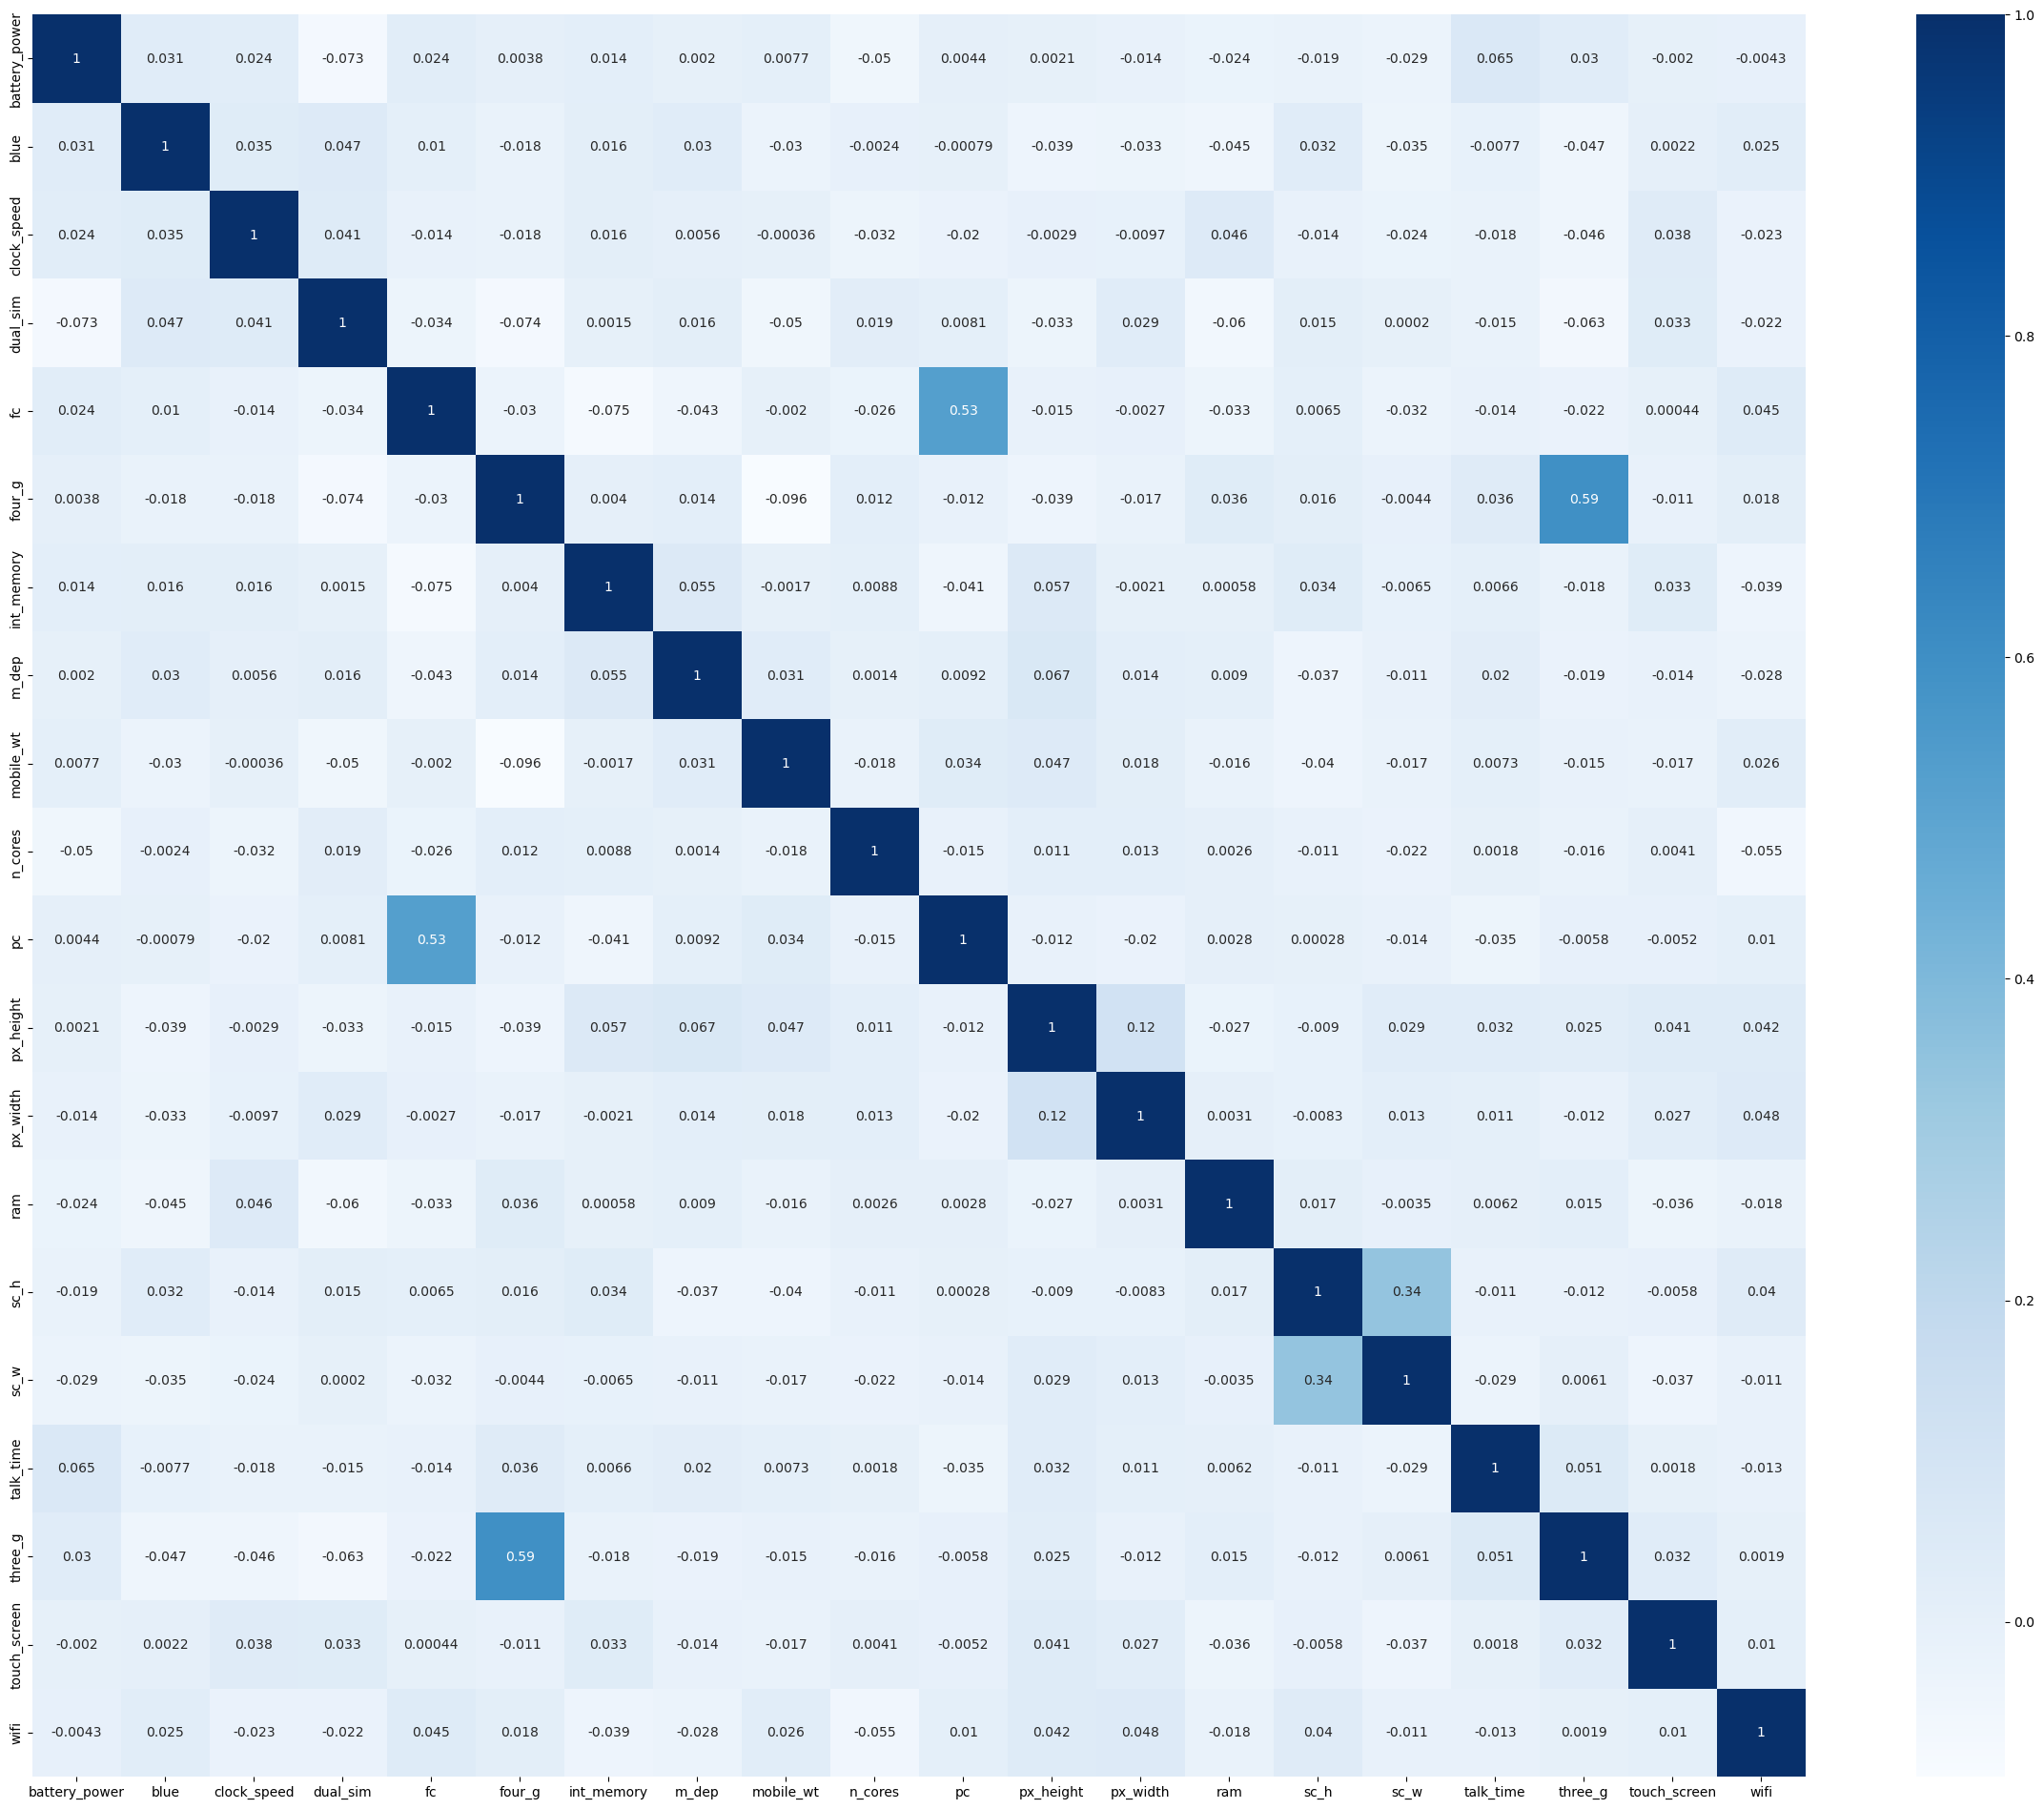

In [4]:
from sklearn import preprocessing, linear_model 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#データの整形を行う
#データの標準化を行う
sc=preprocessing.StandardScaler()
sc.fit(x_list2)

X=sc.transform(x_list2)

sc2=preprocessing.StandardScaler()
sc2.fit(price2)

Y=sc2.transform(price2)

#相関係数を確認する
plt.figure(figsize=(30, 24))
sns.heatmap(x_list2.pct_change().corr(), annot=True, cmap='Blues')

In [5]:
from sklearn import model_selection

#学習データとテストデータに分割する
#分割する割合は2:8 で作業する

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, price2, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier

#決定木分析を, X_train 値と Y_train 値に基づき行う
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model3.fit(X_train, Y_train)

print('正解率 (train):{:.3f}'.format(model3.score(X_train, Y_train)))
print('正解率 (test):{:.3f}'.format(model3.score(X_test, Y_test)))

正解率 (train):0.766
正解率 (test):0.752


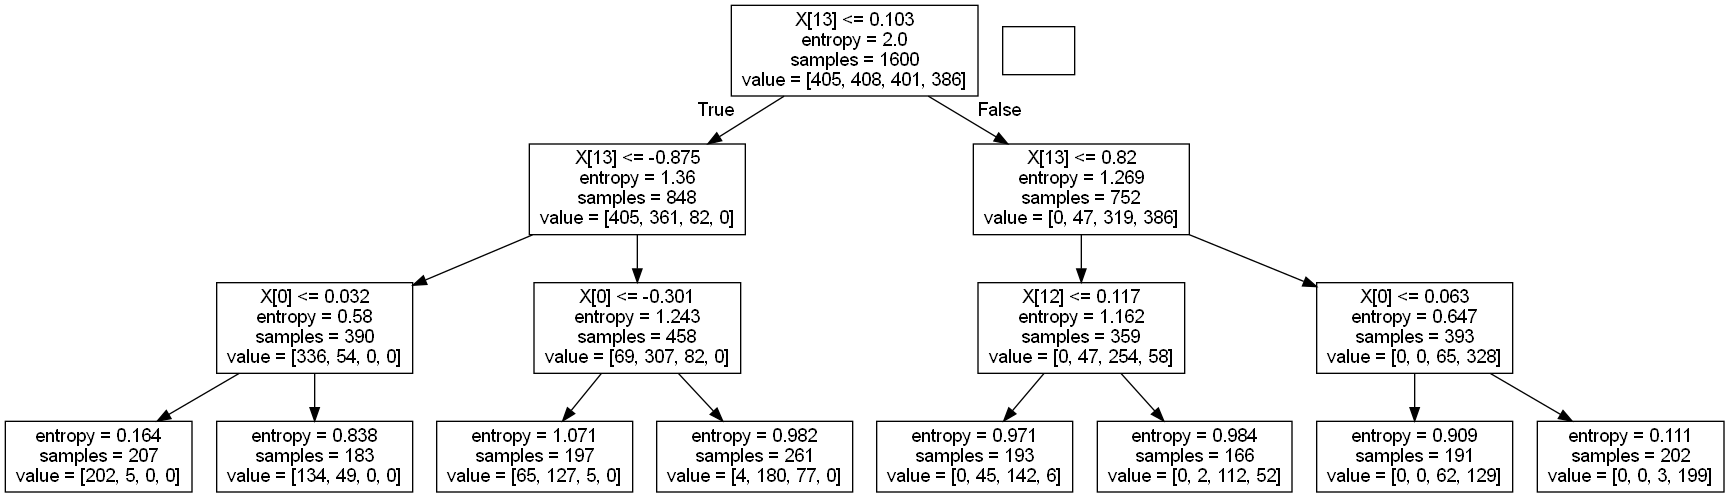

In [7]:
from sklearn import tree
import pydotplus
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image

dot_data=StringIO()
tree.export_graphviz(model3, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.progs = {'dot': u"C:\\Users\\yhara\\Anaconda3\\Library\\bin\\graphviz\\dot.exe"}
graph.progs = {'dot': u"D:\\anaconda\\pkgs\\graphviz-2.50.0-hdb8b0d4_0\\Library\\bin\\dot.exe"}

Image(graph.create_png())

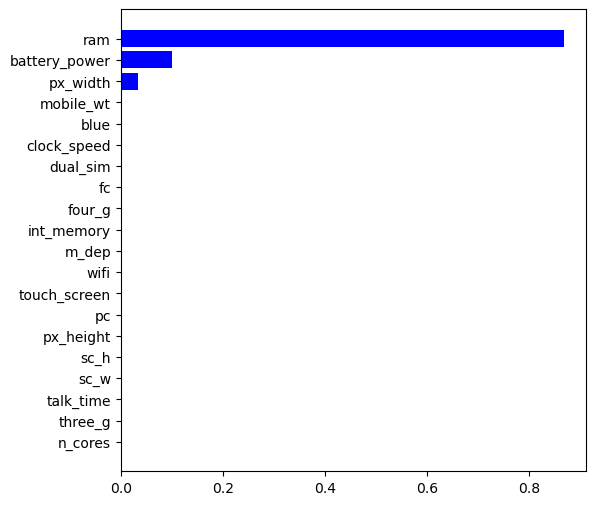

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

features = x_list2.columns
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [9]:
from sklearn.svm import LinearSVR

#LinearSVR モデルを用いる
clf2 = LinearSVR(random_state=0)
clf2.fit(X_train, Y_train)

print("SVMでの係数")
print(clf2.intercept_)
print(clf2.coef_)

SVMでの係数
[1.49448351]
[ 0.23361429  0.00558549 -0.01019858 -0.01469388  0.002778   -0.00485269
  0.00634879 -0.00635742 -0.02066701  0.01586817 -0.0092746   0.11923058
  0.11263405  1.03408401  0.00359934 -0.01002135  0.01182064  0.0193199
 -0.01719773 -0.01018808]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
#SGD Regressor を適用する
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)

print("SGD Regressor での係数")
print(clf.intercept_)
print(clf.coef_)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGD Regressor での係数
[1.49753833]
[ 2.28076889e-01  6.87053139e-03 -4.00496973e-03 -5.10421797e-03
  8.69337784e-03 -1.27294772e-02  2.07331697e-02 -5.93499815e-05
 -2.73163362e-02  1.15984210e-02 -7.16600296e-03  1.21906683e-01
  1.21359145e-01  1.02809075e+00  4.76482918e-03  2.89473464e-03
  5.98317628e-03  5.92262989e-03 -1.52647006e-02 -7.09500040e-03]


In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train, Y_train)

print("\nLasso alpha=0.01 での係数")
print(lasso.intercept_)
print(lasso.coef_)

print(f"training datに対しての精度：{lasso.score(X_train, Y_train)}")
print(f"test set scoreに対しての精度：{lasso.score(X_test, Y_test)}")
print(f"使われている特徴量の数：{np.sum(lasso.coef_ != 0)}")

lasso2 = Lasso(alpha=0.1).fit(X_train, Y_train)

print("\nLasso alpha=0.1 での係数")
print(lasso2.intercept_)
print(lasso2.coef_)

print(f"training datに対しての精度：{lasso2.score(X_train, Y_train)}")
print(f"test set scoreに対しての精度：{lasso2.score(X_test, Y_test)}")
print(f"使われている特徴量の数：{np.sum(lasso2.coef_ != 0)}")

lasso3 = Lasso(alpha=1).fit(X_train, Y_train)

print("\nLasso alpha=1 での係数")
print(lasso3.intercept_)
print(lasso3.coef_)

print(f"training datに対しての精度：{lasso3.score(X_train, Y_train)}")
print(f"test set scoreに対しての精度：{lasso3.score(X_test, Y_test)}")
print(f"使われている特徴量の数：{np.sum(lasso3.coef_ != 0)}")


Lasso alpha=0.01 での係数
[1.49649644]
[ 2.18794212e-01  0.00000000e+00 -0.00000000e+00 -4.96929405e-04
  0.00000000e+00  0.00000000e+00  9.16778250e-03 -0.00000000e+00
 -1.83015868e-02  0.00000000e+00 -0.00000000e+00  1.17398456e-01
  1.13862715e-01  1.01893584e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
training datに対しての精度：0.9166471635233615
test set scoreに対しての精度：0.9219275176365884
使われている特徴量の数：7

Lasso alpha=0.1 での係数
[1.4967564]
[ 0.1296794   0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.          0.05787706
  0.05344904  0.92588839  0.          0.          0.          0.
 -0.         -0.        ]
training datに対しての精度：0.8890126445465354
test set scoreに対しての精度：0.8999160389424548
使われている特徴量の数：4

Lasso alpha=1 での係数
[1.48020701]
[ 0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.          0.          0.
  0.          0.01093581

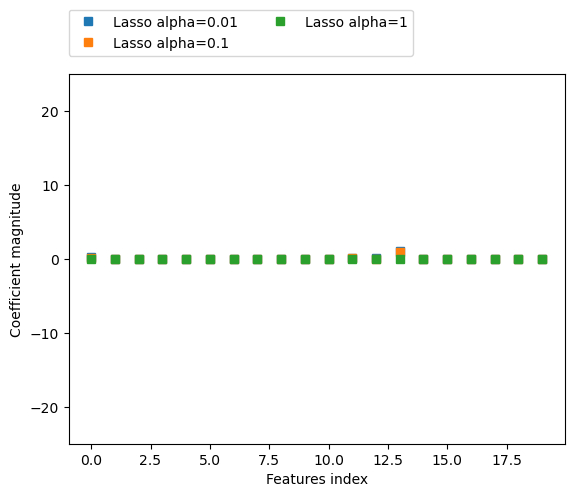

In [12]:
import matplotlib.pyplot as plt

plt.plot(lasso.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso2.coef_, 's', label="Lasso alpha=0.1")
plt.plot(lasso3.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Features index")
plt.ylabel("Coefficient magnitude")

plt.show()

In [13]:
#Ridge 推定を行う
from sklearn.linear_model import Ridge

clf3 = Ridge(random_state=0)
clf3.fit(X_train, Y_train)

print("Ridge での係数")
print(clf3.intercept_)
print(clf3.coef_)

Ridge での係数
[1.49640565]
[[ 2.27536560e-01  6.87781395e-03 -4.02302251e-03 -9.38043417e-03
   8.19024612e-03 -5.73404514e-03  1.81191302e-02 -4.48431439e-03
  -2.80253659e-02  8.60770962e-03 -7.63326085e-03  1.24561088e-01
   1.21405876e-01  1.02783722e+00  8.22953384e-04  8.86726831e-04
   5.78535936e-03  1.04938633e-02 -9.19709933e-03 -1.02333063e-02]]


In [14]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
#モデルの比較
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(random_state=0),
    'Lasso(alpha=0.01)': linear_model.Lasso(alpha=0.01),
    'Lasso(alpha=0.1)': linear_model.Lasso(alpha=0.1),
    'Lasso(alpha=1)': linear_model.Lasso(alpha=1)
}


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

#評価値の計算
scores = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(Y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(Y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(Y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(Y_test, model.predict(X_test))
    
#表示
pd.Series(scores).unstack()

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,MAE,MSE,MedAE,R2
DecisionTreeRegressor,0.172500,0.172500,0.000000,0.866134
Lasso(alpha=0.01),0.273956,0.100604,0.260516,0.921928
Lasso(alpha=0.1),0.294281,0.128968,0.261253,0.899916
Lasso(alpha=1),1.014452,1.274992,1.462417,0.010561
LinearRegression,0.275697,0.101738,0.265272,0.921048
LinearSVR,0.275702,0.102755,0.263993,0.920259
Ridge,0.275678,0.101723,0.265072,0.921059
